# **Fake News Prediction**

# **Intoduction**

Distinguishing real news from fake has become a critica challege for society, media, and technology in this era where misinformation spreds faster across digital platforms.
This project help to tackle fake news detection using machine learning techniques and a dataset of 4000 news articles records ranging from linguistic features like sentiment score and word count to credibility indicators like source reputation and fact check rating.

The dataset blends reliable sources (e.g., New York Times) with misleading ones (e.g., The Onion), offering a real-world lens into misinformation dynamics. The stakes are high: unchecked fake news erodes trust, sways public opinion, and undermines democratic processes. My goal is to build a robust machine learning model to classify news authenticity, leveraging metadata to uncover patterns that traditional content analysis might miss.

Sentiment analysis plays a pivotal role here, as sentiment_score (-1 to 1) captures emotional tone—a potential marker of sensationalism or bias often linked to fake news. By integrating this with statistical (e.g., word_count), social (e.g., num_shares), and credibility features (e.g., trust_score), I aim to create a multidimensional approach that outperforms simpler text-based methods. This project, crafted for my portfolio, demonstrates my expertise in NLP, feature engineering, and supervised learning—skills vital for roles in data science and misinformation mitigation.

**Problem Statement**Develop an accurate classifier to distinguish "Real" from "Fake" news articles, addressing the challenge of misinformation in a diverse, real world dataset

**Objective**The main Objective of this project is to design and evaluate a machine learning pipeline that achieves high precision and recall in detecting fake news


**Steps and Expected Outcomes**

1. **Exploratory Data Analysis (EDA):** Investigate distributions, correlations, and class balance (Real vs. Fake) to identify key predictors—e.g., does high clickbait_score correlate with “Fake”? Expect to uncover metadata patterns distinguishing authenticity.
2. **Preprocessing:** Clean and encode data (e.g., one-hot category, parse date_published), handle text features (title, text), and scale numerical columns. Aim for a robust, model-ready dataset.
3. **Feature Engineering:** Extract advanced features—e.g., text complexity from text, sentiment polarity trends—enhancing predictive power beyond raw metadata.
4. **Model Development:** Train and tune classifiers (e.g., Logistic Regression, Random Forest, XGBoost) on metadata, incorporating sentiment and credibility signals. Target >85% accuracy, prioritizing recall for fake news detection.
5. **Evaluation and Interpretation:** Assess performance with precision, recall, F1-score, and feature importance—explaining why sentiment or source_reputation matters. Deliver a clear, actionable model.
6. **Conclusion:** Summarize findings. 

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc

# Loading of data and cleaning

In [3]:
fake_data = pd.read_csv("fake_news_dataset.csv")
#print the first 5 rows of the data
fake_data.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [4]:
fake_data.shape

(4000, 24)

In [5]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

In [ ]:
title , author, text, state, date_published, source, category, political_bias, fact_check_rating, label

In [6]:
fake_data.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [7]:
fake_data.duplicated().sum()

0

# **Exploratory Data Analysis**

* In this section, we will analyze distributions, uncover pattern and trends, extrapolate insight, identify class balance and relationships (Such as sentiment score over label, source reputation over is satirical as well) to identify predictive signals

# **The Target class distribution (Fake and Real News)**

* The below visual gives quick view of how balanced the dataset is with respect to the target variable(label)
* In classificication task, it is important to detect and know whether one class dominate or not
* Imbalanced data can mislead model to favor the majority class or to mislead the model as well

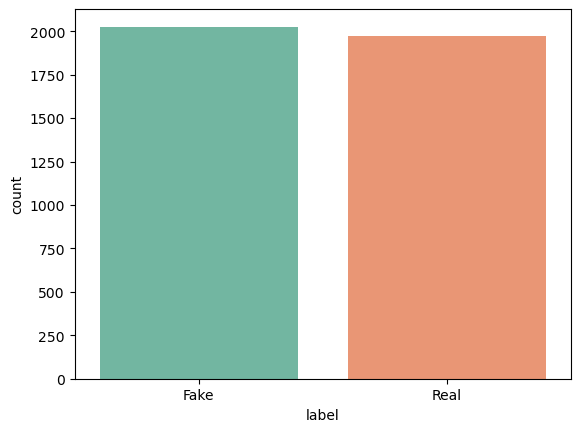

In [15]:
sns.countplot(x="label", data= fake_data, palette="Set2");

* we can see that fake news is slightly higher than real new, just a little different though

# Correlation Heatmap
* Trying to examine the relationship between numerical variables.
* Detect multicollinearity (Highly correlated features) which may affect model performance

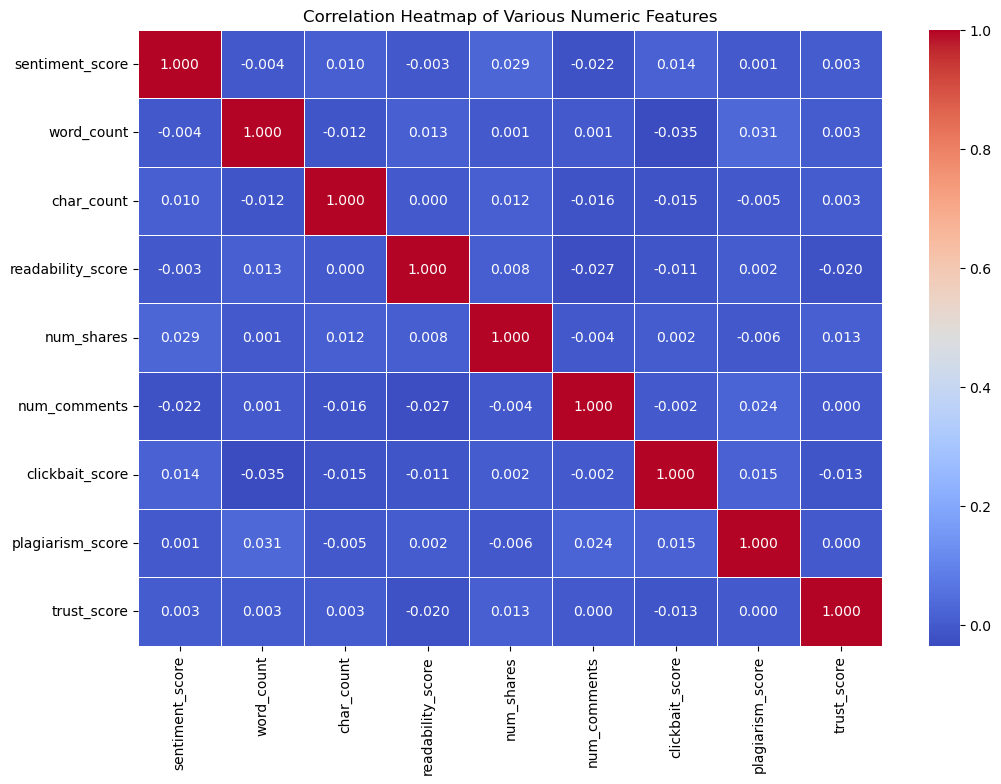

In [24]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = fake_data[['sentiment_score', 'word_count', 'char_count', 'readability_score', 
                         'num_shares', 'num_comments', 'clickbait_score', 'plagiarism_score', 'trust_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap of Various Numeric Features')
plt.show()

# Sentiment Score DIstribution
* To explore how sentiment score ranges from -1 to 1 are distributed
* It help understand whether most news is neutral, positive or negative

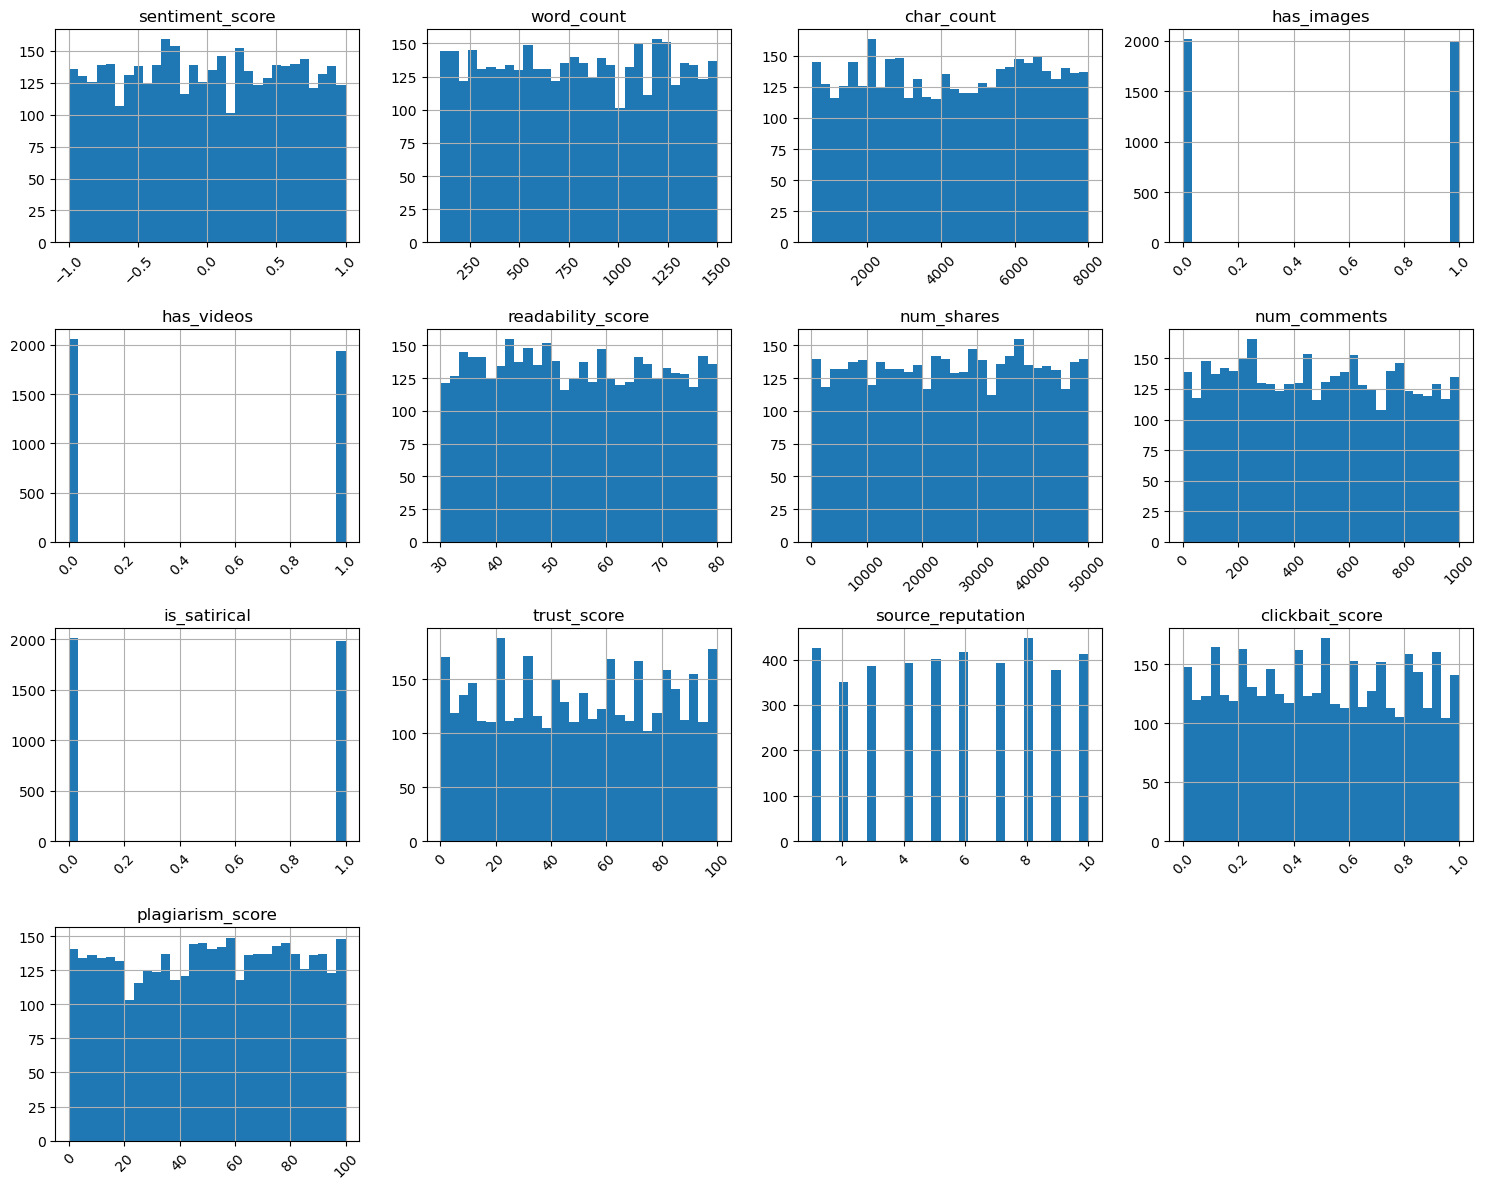

In [17]:
# Distribution of numerical variables
axes = fake_data.drop(columns=['id']).hist(figsize=(15, 12), bins=30,)

# Apply rotation to all subplot x-axis ticks
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Category Distribution

* Trying to see which news categories (like sports, politics, Tech) are most / least frequent
* Could reveal biases or overrepresentation in some categories that may influence predictions

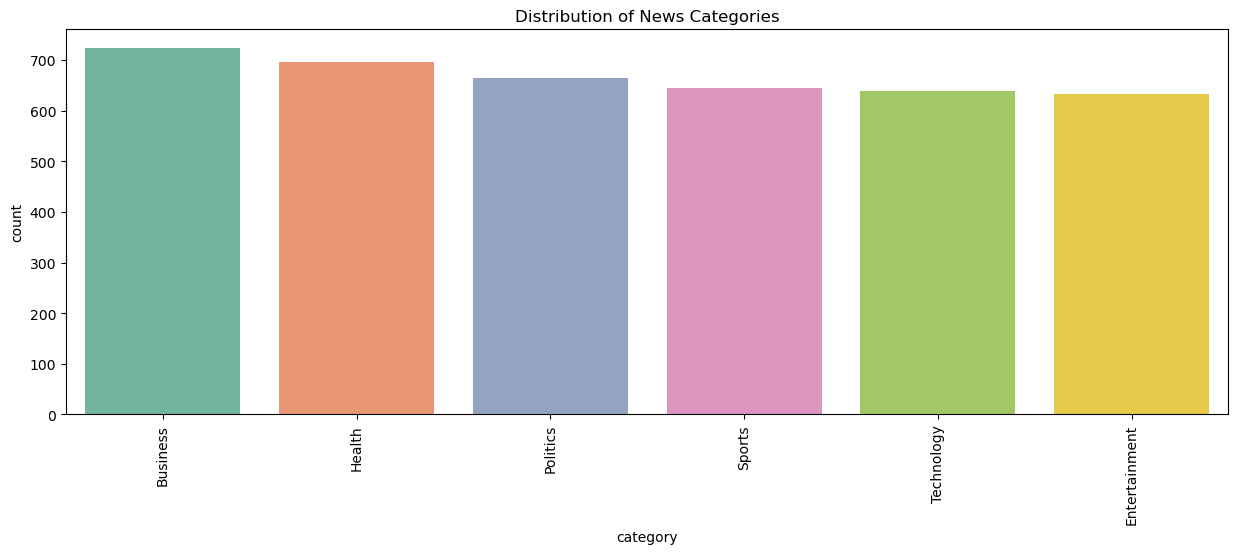

In [21]:
# Count plot of 'category'
plt.figure(figsize=(15, 5))
sns.countplot(data=fake_data, x='category', palette="Set2", order=fake_data['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of News Categories")
plt.show()

#  clickbait over Fake News

* Trying to compare clickbait_score across fake new
* The below boxplot shows the median, quartilws and potential outliers
* It also help in identifying whether fake news articles tend to use more clickbait content which can guide the model design


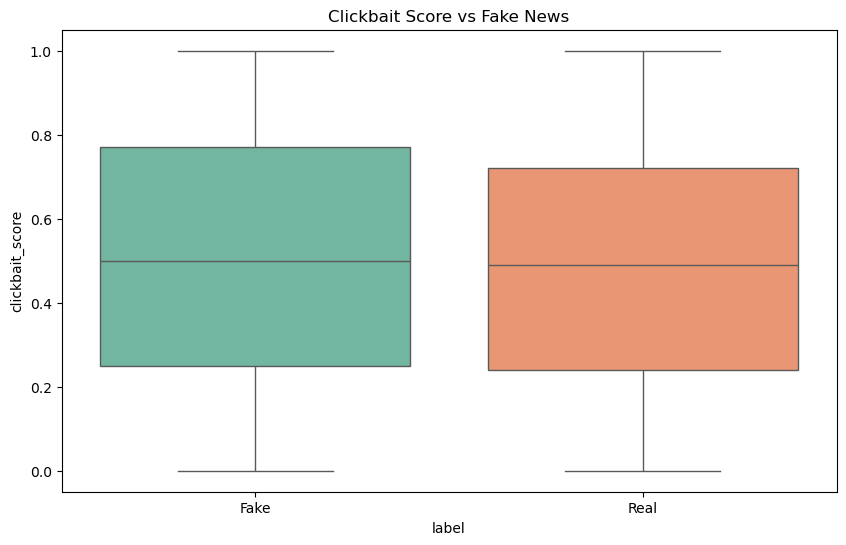

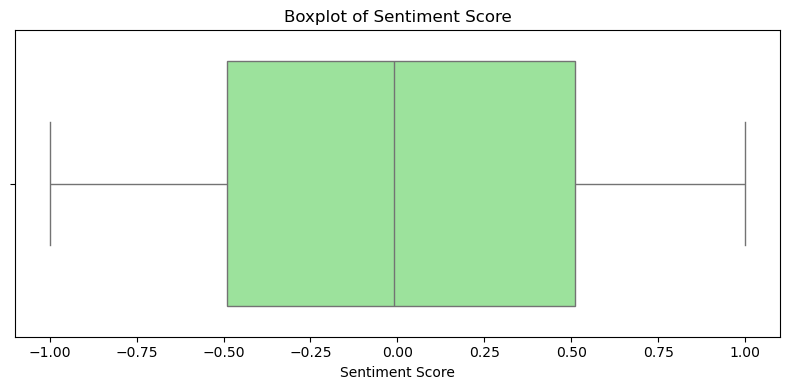

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='clickbait_score', palette="Set2", data=fake_data)
plt.title("Clickbait Score vs Fake News")
plt.show()

# Box Plot for sentiment_score
plt.figure(figsize=(8, 4))
sns.boxplot(data=fake_data, x='sentiment_score', color='lightgreen')
plt.title('Boxplot of Sentiment Score')
plt.xlabel('Sentiment Score')
plt.tight_layout()
plt.show()

# Fact-check Ratings

* To explore how fact check ratings differ between fake and real news
* To also indicates whether certain fact chechk levels are strong indicators of fake or real labels
* To also supports feature importance insight and potentially helps define thresholds for autometic labeling


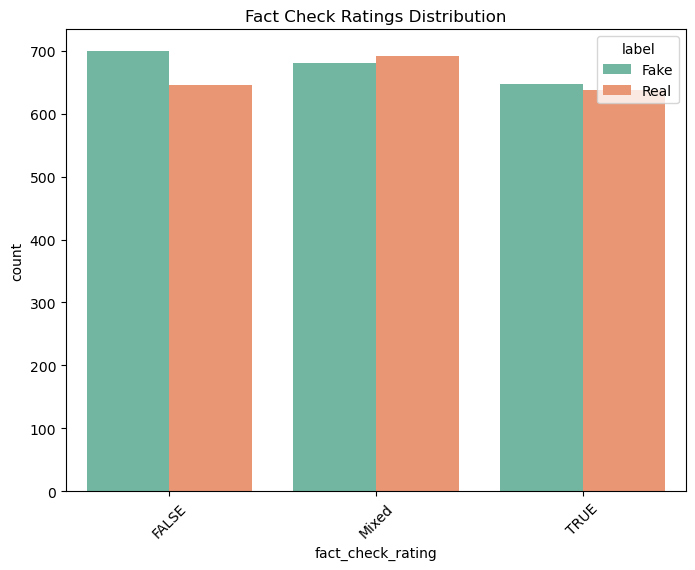

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fact_check_rating', hue='label', palette = "Set2", data=fake_data)
plt.title("Fact Check Ratings Distribution")
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing (feature Encoding)**

In [31]:
 new_df = fake_data.copy(deep=True)

In [36]:
le = preprocessing.LabelEncoder()

# title
le.fit(new_df['title'])
new_df['title'] = le.transform(new_df['title'])

# Author
le.fit(new_df['author'])
new_df['author'] = le.transform(new_df['author'])

# Text
le.fit(new_df['text'])
new_df['text'] = le.transform(new_df['text'])

# State
le.fit(new_df['state'])
new_df['state'] = le.transform(new_df['state'])

# Date_published
le.fit(new_df['date_published'])
new_df['date_published'] = le.transform(new_df['date_published'])

# source
le.fit(new_df['source'])
new_df['source'] = le.transform(new_df['source'])

# category
le.fit(new_df['category'])
new_df['category'] = le.transform(new_df['category'])

# plitical_bias
le.fit(new_df['political_bias'])
new_df['political_bias'] = le.transform(new_df['political_bias'])

# fact_check_rating
le.fit(new_df['fact_check_rating'])
new_df['fact_check_rating'] = le.transform(new_df['fact_check_rating'])

# Target (label)
le.fit(new_df['label'])
new_df['label'] = le.transform(new_df['label'])

In [37]:
correlation_matrix = new_df.corr()

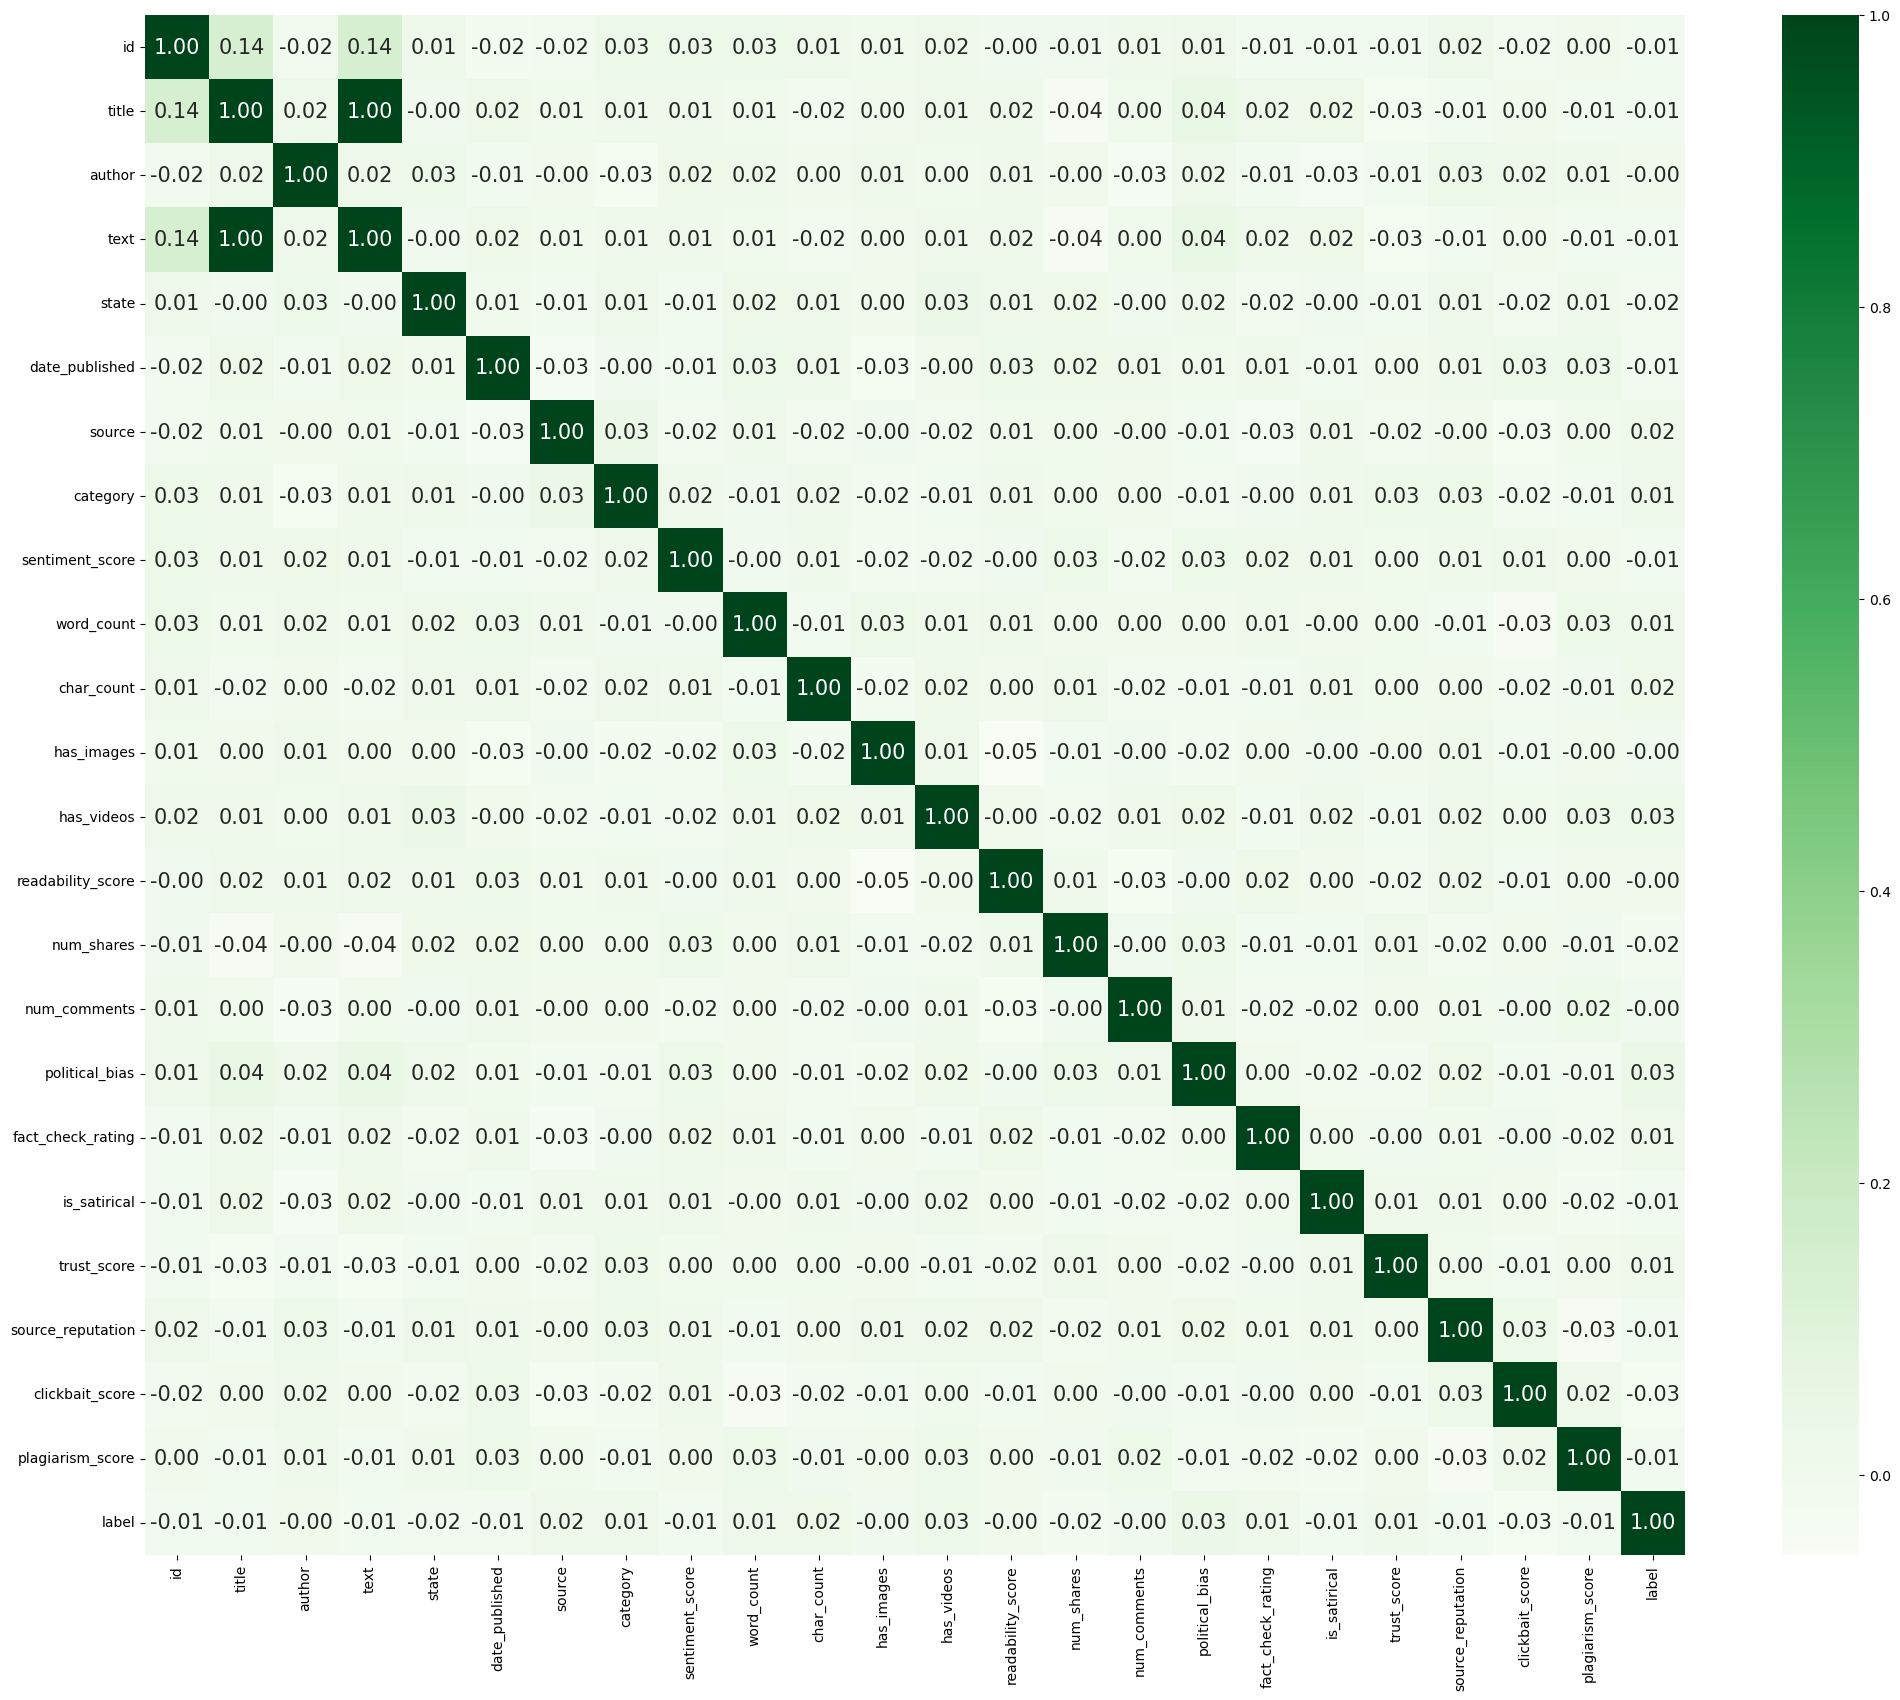

In [39]:
rcParams['figure.figsize'] = 25,20
sns.heatmap(correlation_matrix, cbar=True, square= True,fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens');

In [40]:
new_df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,0,3,0,15,1384,11,1,-0.22,1302,...,47305,450,0,0,1,76,6,0.84,53.35,0
1,2,1111,2,1111,19,82,10,5,0.92,322,...,39804,530,1,1,1,1,5,0.85,28.28,0
2,3,2222,4,2222,9,577,7,4,0.25,228,...,45860,763,0,1,0,57,1,0.72,0.38,0
3,4,3333,0,3333,12,339,2,4,0.94,155,...,34222,945,0,2,1,18,10,0.92,32.20,0
4,5,3445,2,3445,1,1036,3,5,-0.01,962,...,35934,433,2,1,0,95,6,0.66,77.70,1


In [42]:
new_df.label.value_counts()

label
0    2026
1    1974
Name: count, dtype: int64

In [43]:
x = new_df.drop(columns="label", axis=1)

y = new_df["label"]

Prediction Accuracy: 0.52


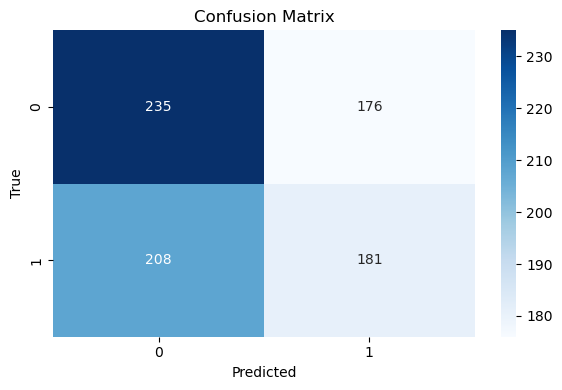

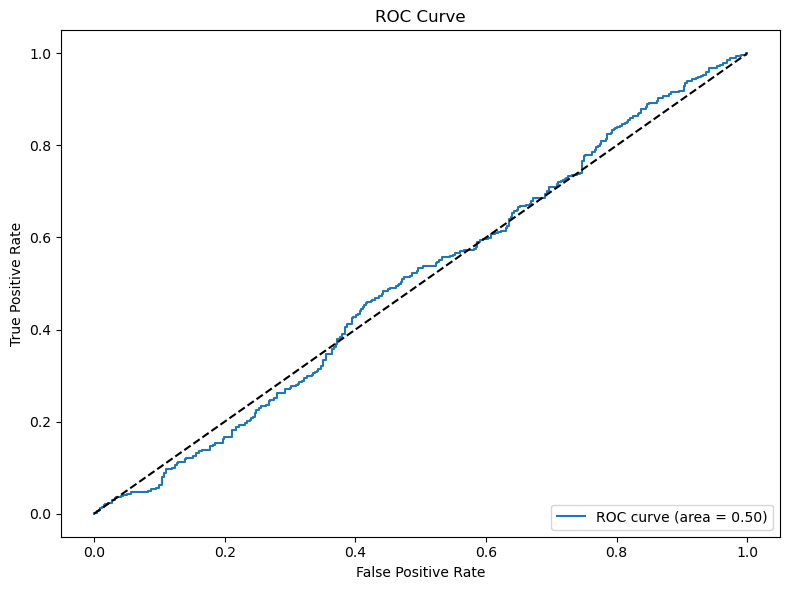

In [53]:
# Scale features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# ROC Curve
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [54]:
model = LogisticRegression()

In [55]:
model.fit(x_train, y_train)

LogisticRegression()

In [56]:
model.score(x_train, y_train)

0.5365625

In [57]:
clf = RandomForestClassifier()

In [58]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
clf.score(x_train, y_train)

1.0

In [66]:
y_pred = clf.predict(x_test)
y_pred[:2]

array([1, 1])

In [67]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       413
           1       0.50      0.50      0.50       387

    accuracy                           0.52       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.52      0.52      0.52       800



In [73]:
f1_score(y_pred, y_test)

0.5

In [72]:
accuracy_score(y_pred, y_test)


0.515